In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imbalanced-learn

In [3]:
df = pd.read_csv("credit_card_fraud_dataset.csv")

In [5]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [9]:
df.isna().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [11]:
total_class_distribution = df['IsFraud'].value_counts()
print("Class distribution in the entire dataset:")
print(total_class_distribution)

Class distribution in the entire dataset:
IsFraud
0    99000
1     1000
Name: count, dtype: int64


In [13]:
df.duplicated().sum()

0

In [17]:
max_value = df['Amount'].max()
df.loc[df['Amount'] == max_value, 'IsFraud']

37148    0
Name: IsFraud, dtype: int64

In [21]:
filtered_df = df[df['IsFraud'] == 1]
print(filtered_df)

       TransactionID             TransactionDate   Amount  MerchantID  \
190              191  2024-09-07 18:24:35.463748  1703.80         916   
191              192  2024-04-27 01:48:35.463751  4248.10         862   
208              209  2023-11-05 01:05:35.463826  1641.32         826   
319              320  2024-06-16 18:30:35.464289   281.18         237   
370              371  2023-10-29 04:09:35.464522  3047.66         789   
...              ...                         ...      ...         ...   
99392          99393  2024-06-05 00:58:36.024971  3358.10         286   
99607          99608  2023-10-27 08:34:36.026018   564.19         454   
99614          99615  2023-11-21 04:18:36.026049  4083.63         514   
99725          99726  2024-08-30 04:40:36.026481  3825.68          15   
99985          99986  2023-11-09 01:03:36.027557   314.63         108   

      TransactionType      Location  IsFraud  
190          purchase      San Jose        1  
191          purchase      Sa

In [35]:
fraud_data = df[df['IsFraud'] == 1]
nonfraud_data = df[df['IsFraud'] == 0]

In [49]:
merchant_counts = fraud_data['MerchantID'].value_counts()

# Filter for MerchantIDs that are repeated
repeated_merchants = merchant_counts[merchant_counts > 1]

# Display the repeated MerchantIDs and their counts
print(repeated_merchants)

MerchantID
640    5
958    5
156    5
583    5
744    4
      ..
204    2
165    2
493    2
658    2
209    2
Name: count, Length: 265, dtype: int64


In [51]:
merchant_counts = nonfraud_data['MerchantID'].value_counts()

# Filter for MerchantIDs that are repeated
repeated_merchants = merchant_counts[merchant_counts > 1]

# Display the repeated MerchantIDs and their counts
print(repeated_merchants)

MerchantID
461    147
188    133
192    129
517    128
820    126
      ... 
936     74
119     73
968     70
512     69
635     69
Name: count, Length: 1000, dtype: int64


In [55]:
class_1_merchants = set(df[df['IsFraud'] == 1]['MerchantID'])
class_0_merchants = set(df[df['IsFraud'] == 0]['MerchantID'])

# Find common MerchantIDs between the two classes
common_merchants = class_1_merchants.intersection(class_0_merchants)

# Print the result
if common_merchants:
    print(f"Common merchants between Class 1 and Class 0: {common_merchants}")
else:
    print("No common merchants between Class 1 and Class 0.")


common_merchant_data = df[df['MerchantID'].isin(common_merchants)]
print(common_merchant_data)


Common merchants between Class 1 and Class 0: {1, 3, 4, 5, 6, 9, 11, 12, 15, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 33, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73, 75, 76, 77, 79, 85, 87, 94, 95, 97, 98, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 118, 119, 120, 123, 124, 126, 127, 129, 131, 132, 134, 135, 136, 137, 138, 139, 144, 145, 146, 152, 156, 157, 159, 160, 161, 162, 164, 165, 168, 169, 170, 174, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 191, 196, 197, 198, 202, 204, 207, 208, 209, 210, 213, 214, 216, 218, 219, 222, 224, 225, 226, 230, 231, 232, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 252, 253, 254, 255, 256, 257, 259, 261, 263, 264, 265, 266, 267, 268, 269, 273, 276, 277, 278, 279, 280, 282, 284, 285, 286, 287, 288, 290, 292, 293, 294, 295, 304, 305, 306, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 321, 322, 3

In [59]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Filter data for Class = 1
class_1_data = df[df['IsFraud'] == 1]

# Sort by MerchantID and TransactionDate
class_1_data = class_1_data.sort_values(by=['MerchantID', 'TransactionDate'])

# Calculate time difference between consecutive transactions for the same merchant
class_1_data['TimeDifference'] = class_1_data.groupby('MerchantID')['TransactionDate'].diff()

# Define a short period of time (e.g., less than 1 day)
short_period = pd.Timedelta(hours=24)  # Adjust as needed

# Flag transactions within the short period
class_1_data['ShortTimeGap'] = class_1_data['TimeDifference'] <= short_period

# Filter transactions that have a short time gap
suspicious_transactions = class_1_data[class_1_data['ShortTimeGap']]

# Display the suspicious transactions
print(suspicious_transactions)

       TransactionID            TransactionDate   Amount  MerchantID  \
72937          72938 2024-07-23 05:41:35.903931  3410.14         673   

      TransactionType  Location  IsFraud  Hour         TimeDifference  \
72937          refund  San Jose        1     5 0 days 07:17:00.237883   

       ShortTimeGap  
72937          True  


In [61]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Filter data for Class = 1
class_1_data = df[df['IsFraud'] == 0]

# Sort by MerchantID and TransactionDate
class_1_data = class_1_data.sort_values(by=['MerchantID', 'TransactionDate'])

# Calculate time difference between consecutive transactions for the same merchant
class_1_data['TimeDifference'] = class_1_data.groupby('MerchantID')['TransactionDate'].diff()

# Define a short period of time (e.g., less than 1 day)
short_period = pd.Timedelta(hours=24)  # Adjust as needed

# Flag transactions within the short period
class_1_data['ShortTimeGap'] = class_1_data['TimeDifference'] <= short_period

# Filter transactions that have a short time gap
suspicious_transactions = class_1_data[class_1_data['ShortTimeGap']]

# Display the suspicious transactions
print(suspicious_transactions)

       TransactionID            TransactionDate   Amount  MerchantID  \
2522            2523 2023-12-22 05:18:35.482932  1374.17           1   
70584          70585 2023-12-27 03:23:35.890863  4757.45           1   
54787          54788 2024-01-09 09:10:35.797276   407.15           1   
14228          14229 2024-01-13 16:00:35.533091  2864.05           1   
59393          59394 2024-01-19 06:12:35.825497  3079.97           1   
...              ...                        ...      ...         ...   
19669          19670 2024-08-28 02:29:35.557418   357.59        1000   
14415          14416 2024-09-03 16:09:35.533877   777.92        1000   
94593          94594 2024-10-01 21:47:36.004486  1011.40        1000   
61806          61807 2024-10-02 00:49:35.837856  2227.77        1000   
70029          70030 2024-10-02 04:59:35.887956  3205.37        1000   

      TransactionType     Location  IsFraud  Hour         TimeDifference  \
2522           refund      Houston        0     5 0 days 11

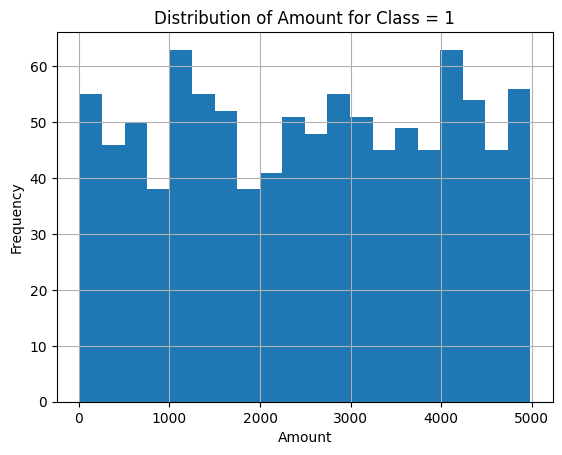

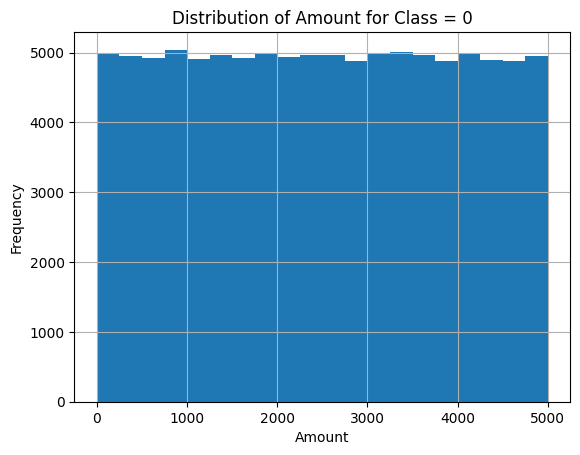

In [39]:
import matplotlib.pyplot as plt
fraud_data['Amount'].hist(bins=20)
plt.title('Distribution of Amount for Class = 1')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

nonfraud_data['Amount'].hist(bins=20)
plt.title('Distribution of Amount for Class = 0')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


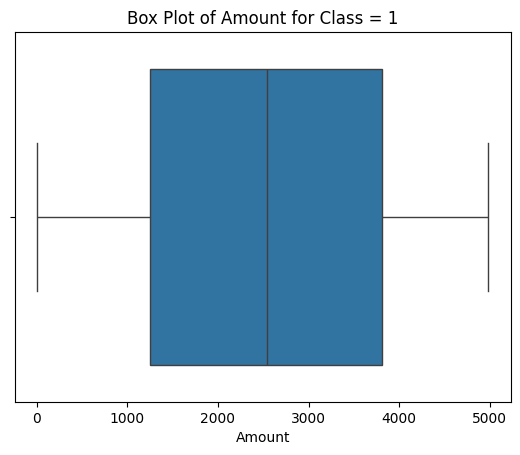

In [41]:
import seaborn as sns
sns.boxplot(data=fraud_data, x='Amount')
plt.title('Box Plot of Amount for Class = 1')
plt.show()